In [3]:
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model, Sequential
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [10]:
train_path = 'images/train'
val_path = 'images/validation'

In [5]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rescale = 1./255
)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rescale = 1./255
)

In [11]:
train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)
val_data = val_datagen.flow_from_directory(
    val_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 60000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [31]:
vgg = VGG16(input_shape=[224,224,3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [32]:
for layer in vgg.layers:
  layer.trainable = False

In [34]:
x = vgg.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
prediction = Dense(1, activation='sigmoid')(x)
model = Model(inputs=vgg.input, outputs=prediction)

In [35]:
checkpoint = ModelCheckpoint('vgg16.h5', save_best_only=True, monitor='val_loss', mode='min')
early_stop = EarlyStopping(monitor='val_loss', patience=2, )
callbacks = [checkpoint, early_stop]

In [36]:
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])

In [42]:
history = model.fit(train_data, validation_data=val_data, epochs=10, callbacks=callbacks)

Epoch 1/10
641/641 [==============================] - ETA: 0s - loss: 0.5828 - accuracy: 0.7676

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


641/641 [==============================] - 320s 488ms/step - loss: 0.5828 - accuracy: 0.7676 - val_loss: 0.2772 - val_accuracy: 0.8882
Epoch 2/10
641/641 [==============================] - 315s 491ms/step - loss: 0.3631 - accuracy: 0.8327 - val_loss: 0.2389 - val_accuracy: 0.9162
Epoch 3/10
641/641 [==============================] - 315s 491ms/step - loss: 0.3514 - accuracy: 0.8449 - val_loss: 0.2314 - val_accuracy: 0.9020
Epoch 4/10
641/641 [==============================] - 315s 491ms/step - loss: 0.3211 - accuracy: 0.8575 - val_loss: 0.1855 - val_accuracy: 0.9273
Epoch 5/10
641/641 [==============================] - 321s 500ms/step - loss: 0.3243 - accuracy: 0.8562 - val_loss: 0.1812 - val_accuracy: 0.9300
Epoch 6/10
641/641 [==============================] - 316s 494ms/step - loss: 0.3060 - accuracy: 0.8677 - val_loss: 0.1838 - val_accuracy: 0.9260
Epoch 7/10
641/641 [==============================] - 319s 498ms/step - loss: 0.2982 - accuracy: 0.8680 - val_loss: 0.2033 - val_accura

In [ ]:
history = model.fit(train_data, validation_data=val_data, epochs=10, callbacks=callbacks)

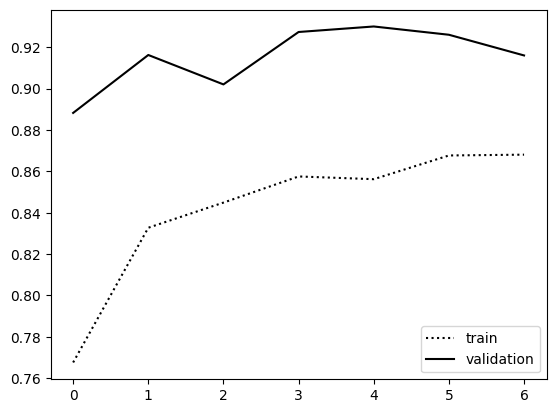

In [43]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], linestyle='dotted',color='black', label='train')
plt.plot(history.history['val_accuracy'], linestyle='solid',color='black', label='validation')
plt.legend()
plt.show()

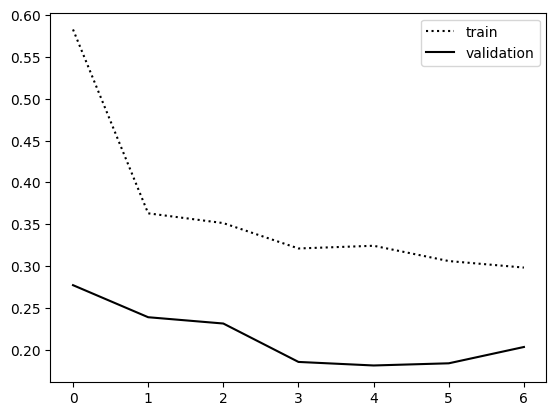

In [44]:
plt.plot(history.history['loss'], linestyle='dotted', color='black', label='train')
plt.plot(history.history['val_loss'], linestyle='solid', color='black', label='validation')
plt.legend()
plt.show()